# Lab 6 - Classifiers Boosting Algorithms

In this lab, we will implement the AdaBoost algorithm as an ensemble learning technique which
aims to combine a number of weak classifiers to yield a strong classifier at the end.
The idea of this lab is to identify whether a tumor with given characteristics is malignant or
benign. This is a two-class classification problem.

## Dataset and Features

You will be working on the dataset from *Hastie et al,* for breast tumor classification with 10 features representing the tumor's:

                              1. Area            6. Texture
                              2. Perimeter       7. Symmetry
                              3. Radius          8. Greyscale Level
                              4. Compactness     9. Fractal Dimension
                              5. Concavity      10. Coastline Approximation.
There is one output variable which is diagnosis. It takes one of two values `+1` for malignant and `-1` for benign.

### Question 1:
Why it is sometimes better to have the two class values `+1` and `-1` instead of `+1`
and `0`?\
**HINT :** Think about the voting scheme at the end of the boosting algorithm. How can the class values
affect this scheme?

In [40]:
'''
    Your answer: 
        ==> The reason why it is sometimes better to have the two class values +1 and -1 instead of +1 and 0 in AdaBoost classifier
            is that AdaBoost uses a decision stump as its base classifier,
            which is a one-level decision tree that splits the data into two groups based on a single feature.
        ==> The decision stump can only output two values, so it makes sense to use +1 and -1 as class labels instead of +1 and 0.
            This way, the decision stump can output either +1 or -1, which can be used to make binary decisions.

        ==> In addition, AdaBoost uses a weighted combination of decision stumps to make its final prediction.
            The weights are chosen such that the misclassified samples have higher weights in the next iteration.
            If we use +1 and 0, then we cannot distinguish between positive and negative samples that are misclassified as 0.
            However, if we use +1 and -1, then we can distinguish between positive and negative samples that are misclassified as -1.
'''

'\n    Your answer: \n        ==> The reason why it is sometimes better to have the two class values +1 and -1 instead of +1 and 0 in AdaBoost classifier\n            is that AdaBoost uses a decision stump as its base classifier,\n            which is a one-level decision tree that splits the data into two groups based on a single feature.\n        ==> The decision stump can only output two values, so it makes sense to use +1 and -1 as class labels instead of +1 and 0.\n            This way, the decision stump can output either +1 or -1, which can be used to make binary decisions.\n\n        ==> In addition, AdaBoost uses a weighted combination of decision stumps to make its final prediction.\n            The weights are chosen such that the misclassified samples have higher weights in the next iteration.\n            If we use +1 and 0, then we cannot distinguish between positive and negative samples that are misclassified as 0.\n            However, if we use +1 and -1, then we can d

## Requirement
You are required to fill the function `adaboost_classifier(Y_train, X_train, Y_test, X_test, T, clf).`\
This function takes as parameters:

| | |
|:---|:-|
| **Y_train**| The target values for the training set |
| **X_train**| The input features for the training set.|
| **Y_test**| The target values for the test set.|
| **Y_train**| The input features for the training set.|
| **T**| The number of iterations of the AdaBoost Algorithm.|
| **clf**| The classifier to be used. (In our case, we are using a decision tree stump as a base classifier). You can use any other classifier.|

This function should return two values:
- The accuracy of the model on the training set.
- The accuracy of the model on the test set.


#### Fair Note:
In the explanation video, we assumed that (T) is the number of models you want to fit. However, this is not always the case. You may have a model base (like here we have decision trees) and you are allowed to use as many of it as you can. So (T) here becomes the number of iterations where your goal is to enhance the performance with as few iterations as possible. 

Do not get confused:
- If your case is you have T models only, we set T = number of models to fit.
- If you are allowed to use as many models as you can (as many decision trees as you need), then T is the number of iterations to choose. In such case, T becomes a parameter controlled by the programmer.

In [41]:
## imports ##
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_hastie_10_2

from utils import get_accuracy, print_accuracy, plot_accuracy

**NOTE** we prepared some utility functions to help you throughout the lab. please go and check the file *utils.py* and make sure you understand each function and know how to use it.

### TODO: AdaBoost Implementation

AdaBoost is an iterative algorithm that gives weights for the best classifier every iteration, updates weights of the data points, then repeats until convergence.

The steps of the algorithm are:

1. Initialize weights of the training examples:

$$w_{m} = \frac {1}{M}, m = 1,2,...M$$

                                        M: number of training examples. 

2. For t=1 to $T$:

    a) Select a classifier $h_{t}$ that best fits to the training data using weights $w_{m}$ of the training examples.

    b) Compute error of $h_{t}$ as:
$$err_{t} = \frac {\Sigma_{m=1}^{M} w_{m} \phi (c_{m} \neq h_{t}(x_{m}))}{\Sigma_{m=1}^{M} w_{m}}$$

    c) Compute weight of classifier:
$$\alpha_{t} = \log (\frac {1-err_{t}}{err_{t}} )$$

    d) Update weights of wrongly classified examples:
$$w_{m} = w_{m} * \exp^{\alpha_{t} \phi (c_{m} \neq h_{t}(x_{m}))}, \space m = 1 ... M$$

    e) Renormalize weights $w_{m}$


\
3. Output: $C(x)= argmax_{k}\space (\space \Sigma_{t=1}^{T} \alpha_{t} * \phi (h_{t}(x) = k)) \space)$

**Where** in step 2.B and 2.D, the $\phi (y)$ function is called the *miss indicator* function that gives values:

                                     1: if y is True
                                     0: if y is False

In [42]:
def adaboost_classifier(Y_train, X_train, Y_test, X_test, T, clf):
    
    #TODO: FILL THE FUNCTION with the implementation as the steps above

    # TODO [1]: Initialize weights
    w = np.array([1/len(X_train) for x in X_train ])

    ## TODO [2]:  Initialize the training and test data with empty array placeholders
    #### Hint: what should be their shape?
    
    # predicted classes of the training examples
    pred_train = np.zeros((T,len(Y_train) ))       
    # predicted classes of the test examples  
    pred_test = np.zeros((T,len(Y_test) ))          

    ## TODO [3]: loop over the boosting iterations 
    for i in range(T): 

        # TODO [4]: Fit a classifier with the specific weights 
        ## TODO [4.A]: fit the classifier on the training data
        #### Hint: search how sklearn.tree.DecisionTreeClassifier fits classifier on data
        ### Hint: search for parameter weights in the fit matrix
        clf.fit(X_train, Y_train, sample_weight=w)
        
        # TODO [4.B]: predict classes for the training data and test data
        pred_train_i = clf.predict(X_train)
        pred_test_i = clf.predict(X_test)
        
        # TODO [5]: calculate the miss Indicator function
        miss = (pred_train_i != Y_train)

        # TODO [6]: calculate the error for the current classifier (err_t)
        err_t = np.sum(w * miss)/np.sum(w)

        # TODO [7]: calculate current classifier weight (Alpha_t)
        alpha_t = np.log((1-err_t)/err_t)

        # TODO [8]: update the weights 
        w = w * np.exp(alpha_t * miss)

        # TODO [9] Add to the overall predictions
        pred_train[i] = pred_train_i * alpha_t
        pred_test[i] = pred_test_i * alpha_t
        
    final_pred_train = np.sum(pred_train, axis=0)
    final_pred_test = np.sum(pred_test, axis=0)

    final_pred_train[final_pred_train >= 0], final_pred_train[final_pred_train < 0]= 1, -1
    final_pred_test[final_pred_test >= 0], final_pred_test[final_pred_test < 0]= 1, -1 

    # TODO [10]: Return error rate in train and test set
    #### Hint: use function get_accuracy from utils.py
    train_error = get_accuracy(final_pred_train, Y_train )
    test_error = get_accuracy(final_pred_test, Y_test )
    
    print_accuracy((train_error* 100, test_error * 100))
    
    return train_error, test_error

### Testing the Boosted Classifier

Now we will use the function you implemented to build a classifer.\
You will not change code here, only read the code below and run it to see how **AdaBoost** enhanced the performance.

Reading Data ...
Number of Iterations :  10
Accuracy: Training: 66.3750 - Test: 66.7083
Number of Iterations :  60
Accuracy: Training: 82.8750 - Test: 83.0417
Number of Iterations :  110
Accuracy: Training: 86.3542 - Test: 86.3750
Number of Iterations :  160
Accuracy: Training: 87.6771 - Test: 87.5417
Number of Iterations :  210
Accuracy: Training: 89.5938 - Test: 89.8750
Number of Iterations :  260
Accuracy: Training: 90.4792 - Test: 90.1667
Number of Iterations :  310
Accuracy: Training: 91.4688 - Test: 91.3750
Number of Iterations :  360
Accuracy: Training: 91.8646 - Test: 91.6667


g:\Computer_Eng\Third Year\Second_Term\Neural Networks\Lab 6 - AdaBoost Classifier\utils.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot1.set_xticklabels(range(0, 450, 50))


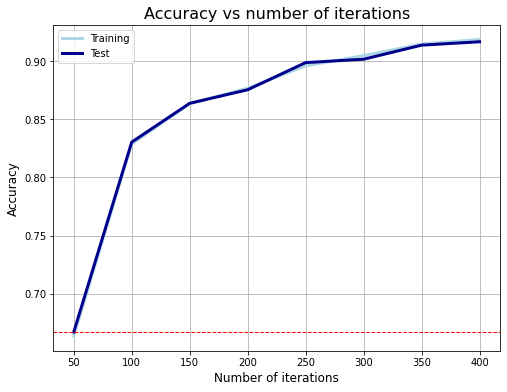

In [43]:
#### DO NOT CHANGE CODE ####

## First, read the dataset
x,y = make_hastie_10_2()
df = pd.DataFrame(x)
df['Y'] = y
print('Reading Data ...')

# Split into training and test set
train, test = train_test_split(df, test_size=0.2) # this function shuffles the data points, and splits the data into
                                                  # 80% training set and 20% test set (indicated by test_size=0.2)

train, test = np.array(train), np.array(test)
X_train, Y_train = train[:, :-1], train[:, -1]
X_test, Y_test = test[:, :-1], test[:, -1]
# Fit a simple decision tree first
clf_tree = DecisionTreeClassifier(max_depth=1, random_state=1)

# Fit Adaboost classifier using a decision tree as base estimator
# Test with different number of iterations
acc_train, acc_test = [],[]
x_range = range(10, 410, 50)
for i in x_range:
    print('Number of Iterations : ' , i)
    acc_i = adaboost_classifier(Y_train, X_train, Y_test, X_test, i, clf_tree)
    acc_train.append(acc_i[0])
    acc_test.append(acc_i[1])

# Compare error rate vs number of iterations
plot_accuracy(acc_train, acc_test)

### Question 2:
Justify why the plot is the way it is (is it increasing or decreasing? why? when does it flattens out?)

In [44]:
'''
    Your answer:
        ==> It's increasing. There is a drastic decrease in slope starting from 100 iterations.
            Going further the slope keeps decreasing until it becomes about 0 starting form 350 iterations.

        ==> The accuracy keeps on improving with iterations because in each iteration the classifier learns from its mistakes
            in the previous iteration and is then weighted depending on the new resulting loss it computes 
            (the smaller it is the larger the weight) hence, accuracy should naturally increase with iterations.

        ==> Now as we can see, at some point it starts to decrease then flatten out which means that there is less to learn
            every iteration (at the beginning with 65 percent accuracy it had much to learn.) so its also natural for the 
            accuracy improvement to slow down as we go. 
'''

"\n    Your answer:\n        ==> It's increasing. There is a drastic decrease in slope starting from 100 iterations.\n            Going further the slope keeps decreasing until it becomes about 0 starting form 350 iterations.\n\n        ==> The accuracy keeps on improving with iterations because in each iteration the classifier learns from its mistakes\n            in the previous iteration and is then weighted depending on the new resulting loss it computes \n            (the smaller it is the larger the weight) hence, accuracy should naturally increase with iterations.\n\n        ==> Now as we can see, at some point it starts to decrease then flatten out which means that there is less to learn\n            every iteration (at the beginning with 65 percent accuracy it had much to learn.) so its also natural for the \n            accuracy improvement to slow down as we go. \n"

### Question 3

The number of iterations (T) is what we call a hyper parameter:
   - Its value differs from model to model and from problem to problem.
   - Its value is not learnt by time, it is set by the programmer.
   
Suggest ways to select the optimal T keeping in mind that:
   - If T is too big, the training time is large (you loop for T times, each time takes a model to fit and this model might take hours to fit)
   - If T is too small, the boosting might not reach the best values it can get.
   
   

**HINT**: Look at the graph of number of iterations vs performance and search for elbow method. Try to understand it and explain what it does.\
**HINT**: There are other hyper-parameter selection techniques, search for them as well.

In [45]:
'''
    Your answer:
        ==> AdaBoost should be run for a long time, until it converges, and that 1,000 iterations should be enough.
            So assuming speed is not issue we can run it a large number of iterations without worrying.    
    
        ==> The elbow method is often used to select the number of clusters in k-means, we keep watching the loss function
            as it decreases with the number of clusters. 
        ==> We can apply the same huerstic to find the number of iterations here.
            Stopping there makes sense because we don't get so much from continuing and we make the model more susceptible 
            to overfitting all while paying the same amount of resources (computationa and time.)
'''

"\n    Your answer:\n        ==> AdaBoost should be run for a long time, until it converges, and that 1,000 iterations should be enough.\n            So assuming speed is not issue we can run it a large number of iterations without worrying.    \n    \n        ==> The elbow method is often used to select the number of clusters in k-means, we keep watching the loss function\n            as it decreases with the number of clusters. \n        ==> We can apply the same huerstic to find the number of iterations here.\n            Stopping there makes sense because we don't get so much from continuing and we make the model more susceptible \n            to overfitting all while paying the same amount of resources (computationa and time.)\n"